# Resonance frequencies of a metal cylindrical cantilever -- Single file analysis -- makes FFT files

Here we explore a practical example of importing and analyzing data taken from an oscilloscope (in this case, Memory Prime Oscilloscope 2CH). We make use of the fast Fourier transform (FFT) algorithm from the numpy library to learn about the natural frequencies that a cantilever ("diving board") makes when perturbed.

What happens here:
* import data from csv file
* select a range of interest (ROI) by user-defined start and stop times
* plot ROI for confirmation
* fast Fourier transform (FFT) of ROI
* save FFT result as a data file

This can be repeated for several files, then:
* show FFT for multiple analyzed files
* analyze spectrum -- e.g., find peak position, estimate Q-factor
* estimate fundamental resonance frequency using a formula

In [22]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [23]:
# user-modified area:
file_dir = './data/'
filename= 'A0010CH1.CSV'

In [24]:
# import data from csv file
filepath = file_dir+filename
data = np.genfromtxt(filepath,delimiter=',',skip_header=17 )
y_values = data[:,0]

Just a simple plot of the imported data, no fancy things like axis labels or legends (we'll do that in a moment). The 'x-axis' is time, in seconds.

In [25]:
x_values = np.arange(0,0.25,0.25/4000)

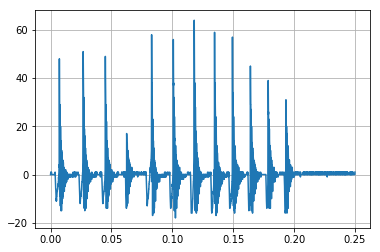

In [26]:
plt.plot(x_values, y_values)
plt.grid()
plt.show()

Define the range of interest (ROI) by defining start and stop times that you are interested in analyzing:

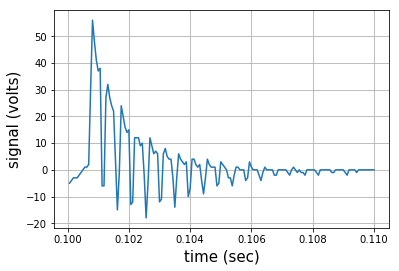

In [27]:
start_time, stop_time = 0.1, 0.11

start_time_idx = np.where(x_values > start_time)[0][0]
stop_time_idx = np.where(x_values > stop_time)[0][0]
x_ROI = x_values[start_time_idx:stop_time_idx]
y_ROI = y_values[start_time_idx:stop_time_idx]

plt.plot(x_ROI,y_ROI)
plt.grid()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (volts)',fontsize=15)
plt.show()
# uncomment the following line to save the image as a *.png file:
# plt.savefig('range of interest.png',dpi=400)

Next we perform the fast Fourier transform (FFT) on data in the ROI do find out the frequency content of this waveform.

In [28]:
Y_FFT = np.fft.fft(y_ROI)
y2 = Y_FFT * np.conjugate(Y_FFT)
pow = abs(y2[1:len(Y_FFT)//2] + y2[:len(Y_FFT)//2:-1])
DT = x_ROI[1]-x_ROI[0]   # sample time
freq = (np.fft.fftfreq(x_ROI.shape[0])/DT)[1:len(Y_FFT)//2]


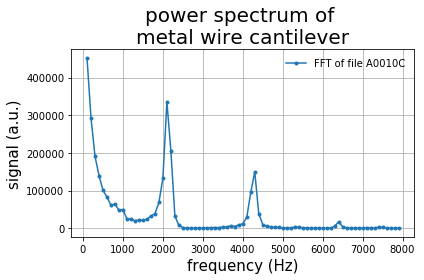

In [30]:
title = 'power spectrum of \nmetal wire cantilever'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.plot(freq,pow,'.-',label='FFT of file '+filename[0:6])

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# plt.xlim([0,400])
plt.legend(frameon=False,loc='best') 
plt.tight_layout() 

# save the figure as a png file. It will be saved to the same directory as your program.
# plt.savefig('mydata.png',dpi=400)

# save the analyzed data to a text file with a name corresponding to the original filename
np.savetxt(file_dir+'FFT_'+filename[0:5]+'.txt', (freq,pow), delimiter=',',fmt='%.4e')

In [33]:
file_dir+'FFT_'+filename[0:5]+'.txt'

'./data/FFT_A0010.txt'

## End of single-file analysis
This concludes the analysis for each file individually. This can be repeated for multiple files, carefully choosing a new ROI each time, and FFT files will be saved in the file directory specified. These files can then be compared and analyzed with the analyis notebook "cantilever_multi-fft-analysis.."